In [ ]:
  §from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import numpy as np
import os

# Define the audio augmentation functions
def  time_stretch(audio_data, rate):
    return librosa.effects.time_stretch(audio_data, rate=rate)


def pitch_shift(audio_data, shift_steps):
    return librosa.effects.pitch_shift(audio_data, sr=22050, n_steps=shift_steps)

def add_background_noise(audio_data, noise):
    noise_offset = np.random.randint(0, noise.shape[0] - audio_data.shape[0])
    noise_sample = noise[noise_offset:noise_offset + audio_data.shape[0]]
    return audio_data + noise_sample * 0.2

def change_volume(audio_data, level):
    return audio_data * level

def time_shift(audio_data, shift):
    return np.roll(audio_data, shift)


In [ ]:
# Define the audio data directory, class labels, and the output directory for the augmented data
audio_dir = '/content/drive/MyDrive/donateacry'
class_labels = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']
output_dir = '/content/drive/MyDrive/augmented donateacry'

In [ ]:
import soundfile as sf

# Load the audio files and apply augmentation techniques
for label in class_labels:
    class_audio_dir = os.path.join(audio_dir, label)
    class_output_dir = os.path.join(output_dir, label)
    os.makedirs(class_output_dir, exist_ok=True)
    for filename in os.listdir(class_audio_dir):
        if filename.endswith('.wav'):
            # Load the audio file
            audio_path = os.path.join(class_audio_dir, filename)
            audio_data, sr = librosa.load(audio_path, sr=22050)

            # Apply time stretching
            stretched_audio = time_stretch(audio_data, np.random.uniform(0.8, 1.2))
            output_path = os.path.join(class_output_dir, f'{filename[:-4]}_stretched.wav')
            sf.write(output_path, stretched_audio, sr)
            

            # Apply pitch shifting
            pitch_shifted_audio = pitch_shift(audio_data, np.random.randint(-3, 3))
            output_path = os.path.join(class_output_dir, f'{filename[:-4]}_pitch_shifted.wav')
            sf.write(output_path, stretched_audio, sr)

            # # Add background noise
            # noise_path = 'path/to/background/noise'
            # noise_data, sr = librosa.load(noise_path, sr=22050)
            # noisy_audio = add_background_noise(audio_data, noise_data)
            # output_path = os.path.join(class_output_dir, f'{filename[:-4]}_noisy.wav')
            # sf.write(output_path, stretched_audio, sr)

            # Change volume
            vol_level = np.random.uniform(0.5, 2.0)
            vol_changed_audio = change_volume(audio_data, vol_level)
            output_path = os.path.join(class_output_dir, f'{filename[:-4]}_vol_changed.wav')
            sf.write(output_path, stretched_audio, sr)

            # Time shift
            time_shifted_audio = time_shift(audio_data, np.random.randint(-22050, 22050))
            output_path = os.path.join(class_output_dir, f'{filename[:-4]}_time_shifted.wav')
            sf.write(output_path, stretched_audio, sr)

In [ ]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_audio_folder(audio_folder_path, output_folder_path, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    # Create output folder if it does not exist
    os.makedirs(output_folder_path, exist_ok=True)
    
    # Loop over all audio files in the input folder
    for file_name in os.listdir(audio_folder_path):
        if file_name.endswith('.wav'):
            # Load audio file
            file_path = os.path.join(audio_folder_path, file_name)
            audio, _ = librosa.load(file_path, sr=sr)
            
            # Reshape audio data if necessary
            if len(audio.shape) > 1:
                audio = np.mean(audio, axis=1)
            
            # Compute Mel spectrogram
            mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
            
            # Convert to decibels
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
            
            # Save spectrogram as PNG image to output folder
            output_file_path = os.path.join(output_folder_path, file_name.replace('.wav', '.png'))
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', hop_length=hop_length)
            plt.colorbar(format='%+2.0f dB')
            plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0)
            plt.close()

In [ ]:
input_folder_path = '/content/drive/MyDrive/donateacry/belly_pain'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/belly_pain'
preprocess_audio_folder(input_folder_path, output_folder_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/donateacry/burping'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/burping'
preprocess_audio_folder(input_folder_path, output_folder_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/donateacry/discomfort'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/discomfort'
preprocess_audio_folder(input_folder_path, output_folder_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/donateacry/hungry'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/hungry'
preprocess_audio_folder(input_folder_path, output_folder_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/donateacry/tired'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/tired'
preprocess_audio_folder(input_folder_path, output_folder_path)

In [ ]:
input_folder_path = '/content/drive/MyDrive/augmented donateacry/belly_pain'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/belly_pain'
preprocess_audio_folder(input_folder_path, output_folder_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/augmented donateacry/burping'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/burping'
preprocess_audio_folder(input_folder_path, output_folder_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/augmented donateacry/discomfort'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/discomfort'
preprocess_audio_folder(input_folder_path, output_folder_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/augmented donateacry/hungry'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/hungry'
preprocess_audio_folder(input_folder_path, output_folder_path)


In [ ]:
input_folder_path = '/content/drive/MyDrive/augmented donateacry/tired'
output_folder_path = '/content/drive/MyDrive/spectrogram_aug/tired'
preprocess_audio_folder(input_folder_path, output_folder_path)

In [ ]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
import os
import numpy as np
import tensorflow as tf

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

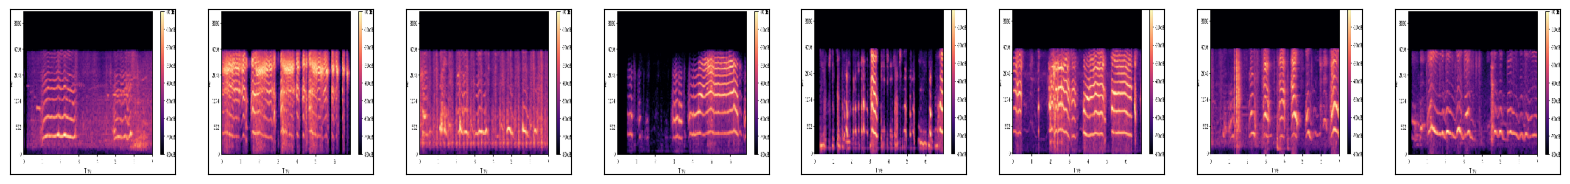

In [ ]:
  images, labels = load_images_from_path('/content/drive/MyDrive/spectrogram_aug/belly_pain', 0)
  show_images(images)
      
  x += images
  y += labels

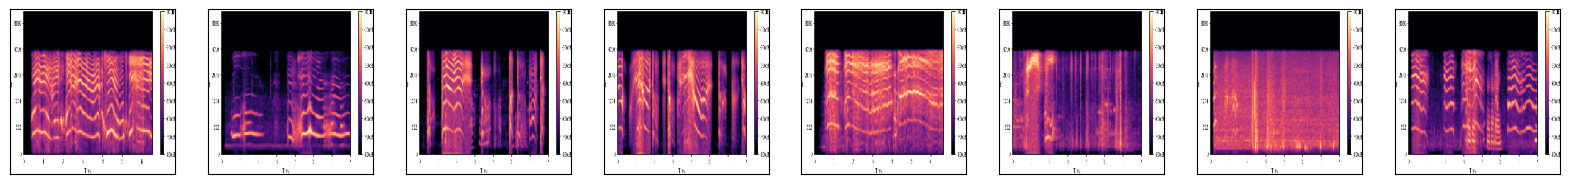

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/spectrogram_aug/burping', 1)
show_images(images)
    
x += images
y += labels

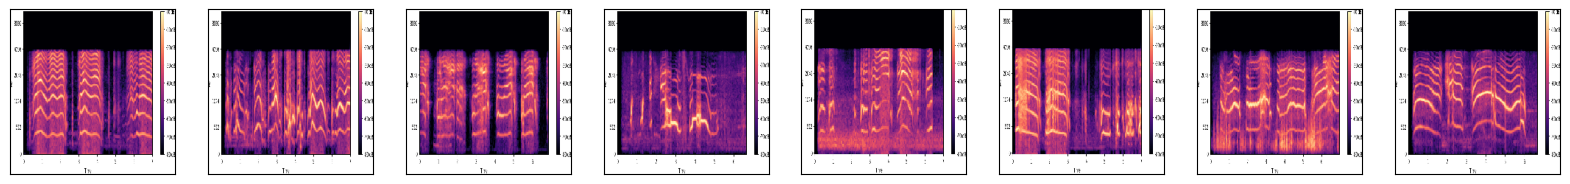

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/spectrogram_aug/discomfort', 2)
show_images(images)
    
x += images
y += labels

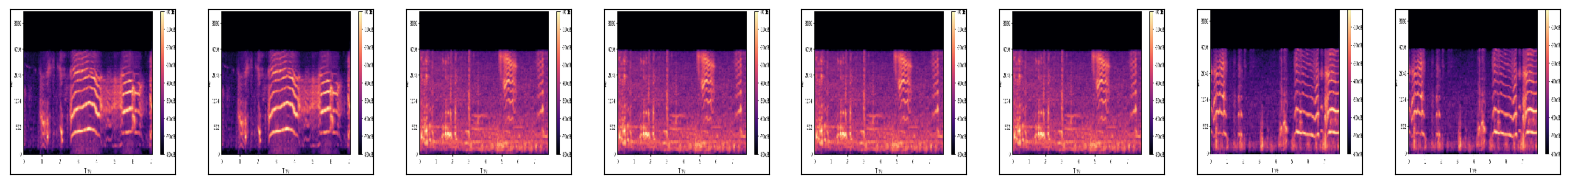

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/spectrogram_aug/hungry', 3)
show_images(images)
    
x += images
y += labels

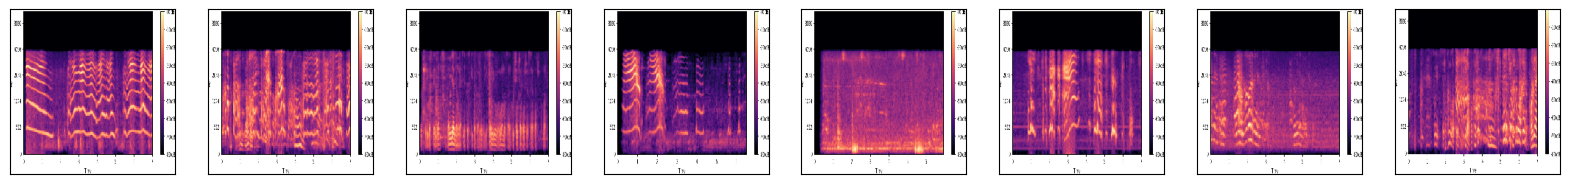

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/spectrogram_aug/tired', 4)
show_images(images)
    
x += images
y += labels

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)



In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

x = np.array(x)
y = np.array(y)

smote = SMOTE(sampling_strategy='minority')
x_resampled, y_resampled = smote.fit_resample(x.reshape(x.shape[0], -1), y)
x_resampled = x_resampled.reshape(x_resampled.shape[0], x.shape[1], x.shape[2], x.shape[3])



In [ ]:
x_train_norm = x_resampled / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_resampled)
y_test_encoded = to_categorical(y_test)

In [ ]:
x_train_norm.shape

(4101, 224, 224, 3)

In [ ]:
num_folds = 5
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = []

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# define early stopping callback
earlystop_callback = early_stop = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, mode='max', verbose=1, restore_best_weights=True
)


In [ ]:
for train_idx, test_idx in kf.split(x_train):
    X_train_fold, y_train_fold = x_train_norm[train_idx], y_train_encoded[train_idx]
    X_test_fold, y_test_fold = x_train_norm[test_idx], y_train_encoded[test_idx]
    

    input_shape = (224, 224, 3) # (time_steps, freq_bins, channels)
    model = keras.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(5, activation="softmax"))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), 
                 batch_size=10, epochs=15, #class_weight=class_weights, 
                 callbacks=[earlystop_callback])

    
    # Make predictions on the current fold of the test data
    y_pred_fold = model.predict(X_test_fold)
    
    # Compute the accuracy score for the current fold and add it to the list of scores
    fold_score = accuracy_score(y_test_fold, y_pred_fold)
    cv_scores.append(fold_score)

# Compute the mean and standard deviation of the cross validation accuracy scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean cross validation accuracy score: {mean_cv_score:.3f} +/- {std_cv_score:.3f}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 flatten (Flatten)           (None, 774400)            0         
                                                                 
 dense (Dense)               (None, 128)               99123328  
                                                        